In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

torch.manual_seed(1)

import matplotlib.pyplot as plt
%matplotlib inline

### 토이 데이터 생성

In [23]:
x = torch.arange(1,101)
x = Variable(x).unsqueeze(1) # view(-1,1) => 각 숫자마다 차원 생성

y = torch.linspace(0,10,100) + torch.randn(100)
y = Variable(y).unsqueeze(1) # view(-1,1)

print(x[:10])
print(y[:10])

tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]])
tensor([[ 1.7997],
        [ 0.3834],
        [ 0.4172],
        [ 1.2415],
        [ 1.8697],
        [-0.0514],
        [-0.1388],
        [ 0.5049],
        [ 1.1518],
        [ 1.2809]])


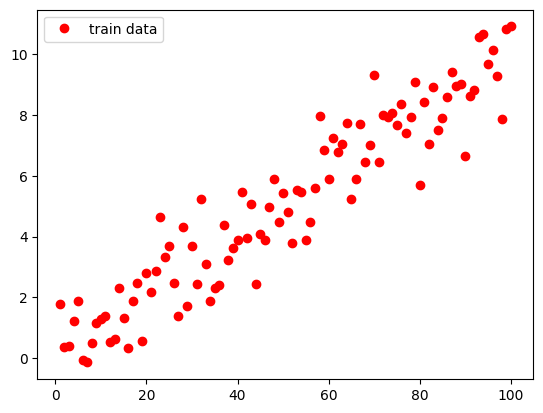

In [24]:
plt.plot(x.data.numpy(), y.data.numpy(), 'ro', label='train data')
plt.legend()
plt.show()

### 모델링

In [25]:
model = nn.Linear(1, 1)
print([p for p in model.parameters()])

loss_function = nn.MSELoss()

[Parameter containing:
tensor([[0.6388]], requires_grad=True), Parameter containing:
tensor([0.7208], requires_grad=True)]


### 트레이닝

In [36]:
epochs = 6
learning_rate = 0.0001

[0/6] loss : 1020.071


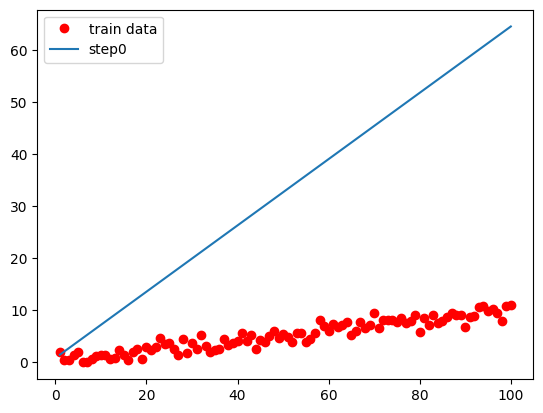

[1/6] loss : 107.469


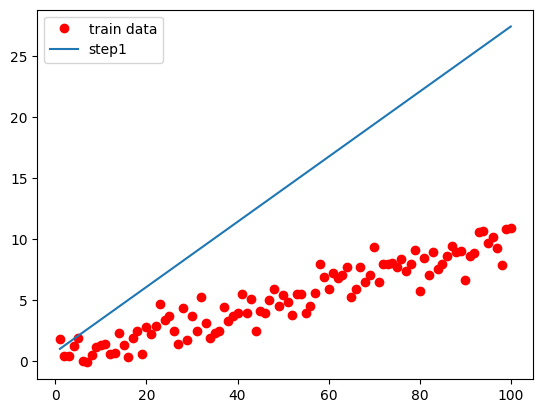

[2/6] loss : 12.170


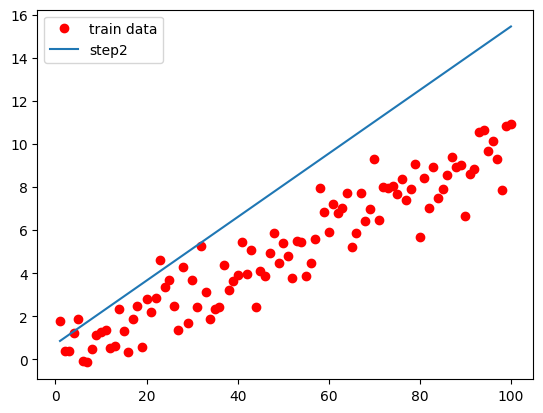

[3/6] loss : 2.219


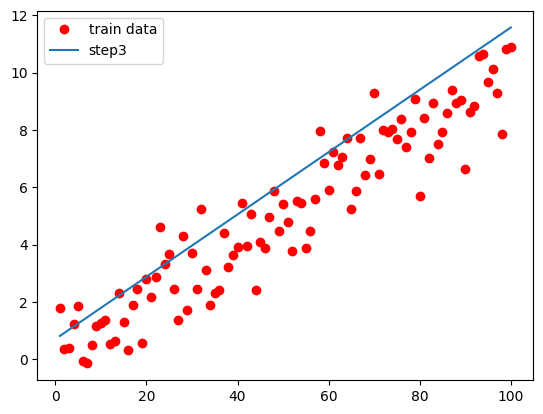

[4/6] loss : 1.179


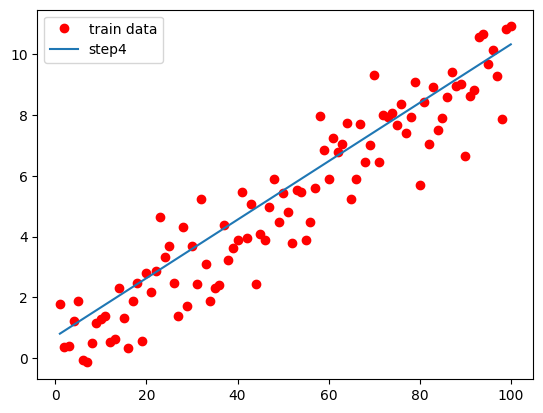

[5/6] loss : 1.071


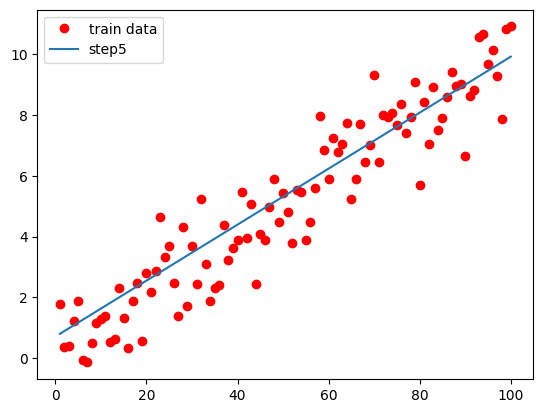

In [37]:
x = x.to(torch.float32)

for epoch in range(epochs):
    model.zero_grad()
    pred = model(x)
    loss = loss_function(pred, y)
    
    print("[%d/%d] loss : %.3f" % (epoch, epochs, loss.item()))
    plt.plot(x.data.numpy(), y.data.numpy(), 'ro', label='train data')
    plt.plot(x.data.numpy(), pred.data.numpy(), label='step'+str(epoch))
    plt.legend()
    plt.show()
    
    # gradient descent
    loss.backward()
    for param in model.parameters():
        param.data += -learning_rate * param.grad.data
        #param.data.add_(-learning_rate, param.grad.data)

### TODO list
모델을 클래스 형태로 바꿔보기 (nn.Module 상속)

변수를 더 늘려보기 (univariate -> multivariate)

learning rate 바꿔보기 (늘리거나 줄여서 결과 확인해보기)

optimizer를 사용해서 gradient descent해보기